In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import scipy.fftpack as spfft
import scipy.ndimage as spimg
import cvxpy as cvx
from matplotlib.pyplot import plot, show, figure, title, xlim, ylim

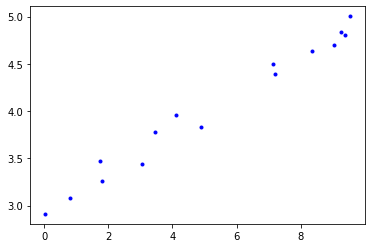

In [ ]:
# generate some data with noise
x = np.sort(np.random.uniform(0, 10, 15))
y = 3 + 0.2 * x + 0.1 * np.random.randn(len(x))
plot(x,y,"b.")
show()

Optimization terminated successfully.
         Current function value: 1.174047
         Iterations: 59
         Function evaluations: 112
Optimization terminated successfully.
         Current function value: 0.146678
         Iterations: 88
         Function evaluations: 173


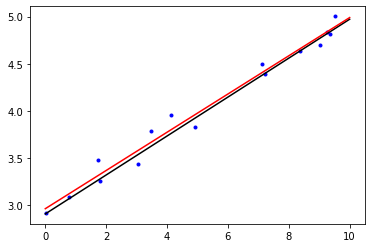

In [ ]:
# find L1 line fit
l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
xopt1 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y))
x1 = np.linspace(0,10,100)
y1 = xopt1[0]*x1+xopt1[1]

# find L2 line fit
l2_fit = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
xopt2 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y))
x2 = np.linspace(0,10,100)
y2 = xopt2[0]*x2+xopt2[1]

plot(x,y,"b.",x1,y1,"black", x2,y2, "r")
show()

Optimization terminated successfully.
         Current function value: 8.114194
         Iterations: 61
         Function evaluations: 114
Optimization terminated successfully.
         Current function value: 20.623484
         Iterations: 52
         Function evaluations: 102


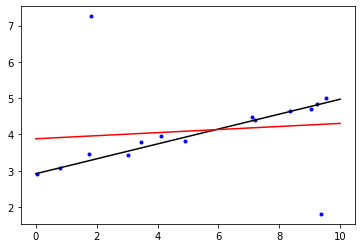

In [ ]:
# adjust data by adding outlyers
y[3] += 4
y[13] -= 3

# refit the lines
xopt12 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y))
y1 = xopt12[0]*x1+xopt12[1]

xopt22 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y))
y2 = xopt22[0]*x2+xopt22[1]

plot(x,y,"b.",x1,y1,"black", x2,y2, "r")
show()

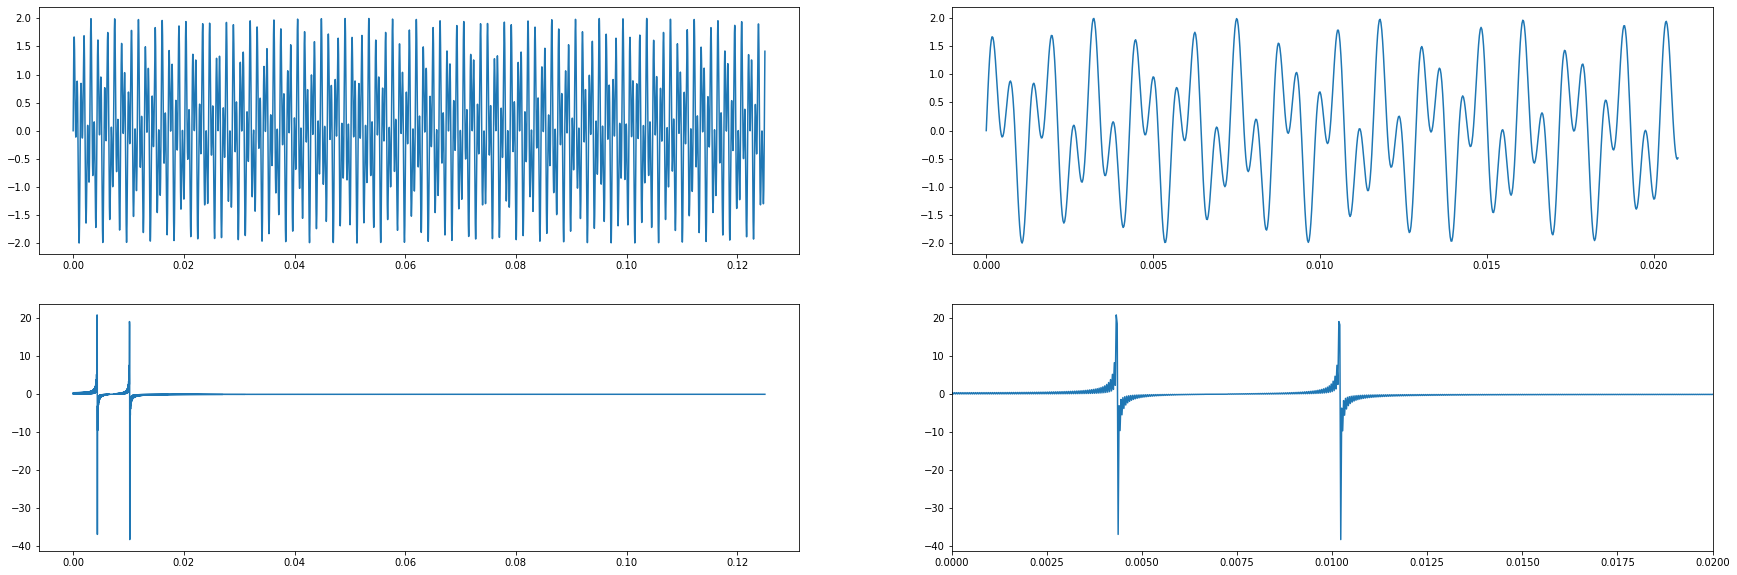

In [ ]:
# sum of two sinusoids
n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(1394 * np.pi * t) + np.sin(3266 * np.pi * t)
yt = spfft.dct(y, norm='ortho')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 10))
ax[0,0].plot(t,y)
ax[0,1].plot(t[:830],y[:830])
ax[1,0].plot(t,yt)
ax[1,1].plot(t,yt)
xlim(0,0.02)
show()

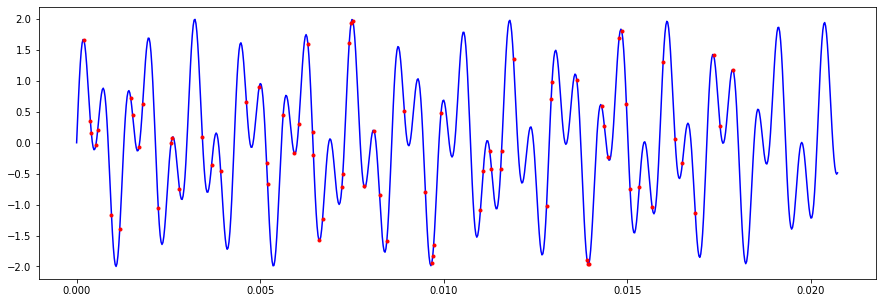

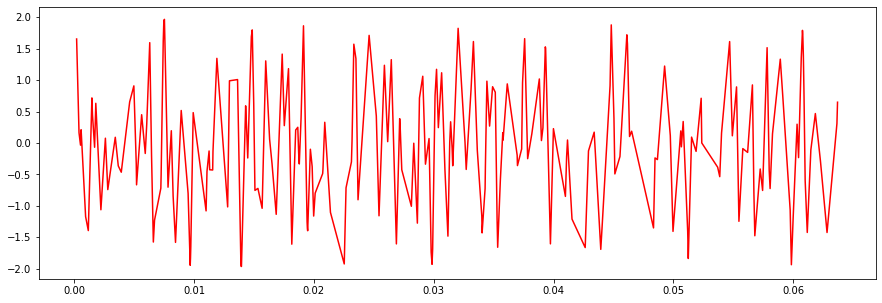

In [ ]:
# extract small sample of signal
m = 500 # 10% sample
ri = np.random.choice(n, m, replace=False) # random sample of indices
ri.sort() # sorting not strictly necessary, but convenient for plotting
t2 = t[ri]
y2 = y[ri]

figure(figsize=(15,5))
plot(t[:830],y[:830],"b",t2[:75],y2[:75],"r.")
figure(figsize=(15,5))
plot(t2[:250],y2[:250],"r")
show()

In [ ]:
# create idct matrix operator
A = spfft.idct(np.identity(n), norm='ortho', axis=0)
A = A[ri]

# do L1 optimization
vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 1))
constraints = [A*vx == y2]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +9.586e-23  -0.000e+00  +2e+04  1e+00  1e-02  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +1.341e+02  +1.342e+02  +1e+04  9e-01  5e-03  5e-01  1e+00  0.6373  9e-02   1  1  1 |  0  0
 2  +1.674e+02  +1.676e+02  +8e+03  7e-01  4e-03  6e-01  8e-01  0.4610  6e-01   1  1  0 |  0  0
 3  +2.118e+02  +2.120e+02  +5e+03  5e-01  2e-03  4e-01  5e-01  0.6122  4e-01   1  0  0 |  0  0
 4  +2.497e+02  +2.498e+02  +3e+03  2e-01  1e-03  2e-01  3e-01  0.6581  3e-01   1  0  0 |  0  0
 5  +2.855e+02  +2.856e+02  +1e+03  1e-01  7e-04  1e-01  1e-01  0.6243  2e-01   1  0  1 |  0  0
 6  +3.147e+02  +3.147e+02  +7e+02  6e-02  3e-04  6e-02  7e-02  0.6175  2e-01   1  0  1 |  0  0
 7  +3.393e+02  +3.393e+02  +3e+02  3e-02  1e-04  3e-02  3e-02  0.6928  2e-01   1  1  1 |  0  0
 8  +3.479e+02  +3.479e+02  +2e+02  1e-02  8e-

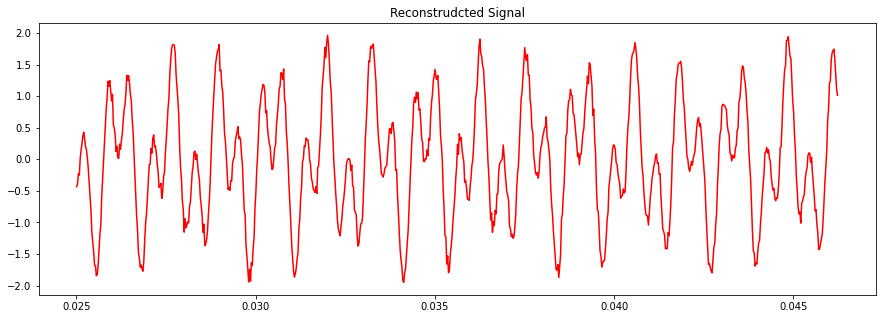

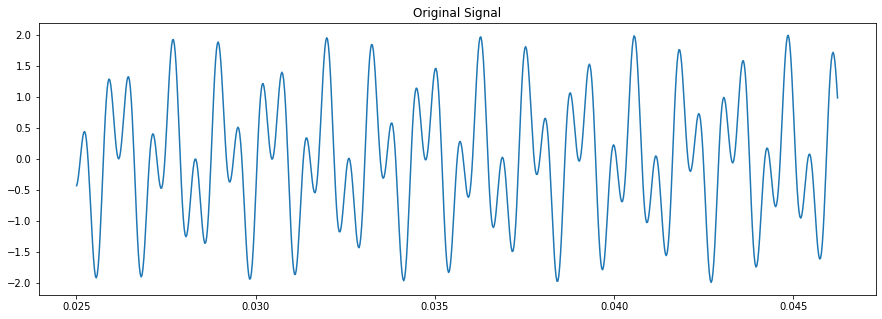

In [ ]:
# reconstruct signal
x = np.array(vx.value)
x = np.squeeze(x)
sig = spfft.idct(x, norm='ortho', axis=0)

figure(figsize=(15,5))
plot(t[1000:1850],sig[1000:1850],"r")
title("Reconstrudcted Signal")
figure(figsize=(15,5))
plot(t[1000:1850],y[1000:1850])
title("Original Signal")
show()

